# k-fold cross validation

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#read in the iris data
iris=load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
X=iris.data #loading the features
y=iris.target #loading the response

In [4]:
scores=[]
rty=range(1,10)
#use train test split with different random_state values
for rst in rty:
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=rst)
    #check classification accuracy of knn
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

print(scores)
    
    

[1.0, 1.0, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.8947368421052632, 0.9210526315789473, 1.0]


Text(0,0.5,' Accuracy')

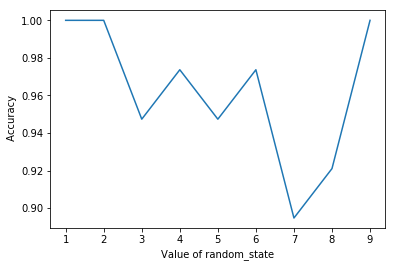

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of random-stae(x-axis) versus the  accuracy (y-axis)
plt.plot(rty,scores)
plt.xlabel('Value of random_state')
plt.ylabel(' Accuracy')

In [6]:
from sklearn.cross_validation import KFold #importing Kfold

/home/varun/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
#simulating the splitting of a dataset of 25 observations into 5 folds
kf=KFold(25,n_folds=5,shuffle=False)

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
#10-fold cross validation with k=5 in knn
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [10]:
#use the average accuracy as the measure of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [11]:
#search for an optimal value of k in knn 
k_range=range(1,40)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334]


Text(0,0.5,'accuracy')

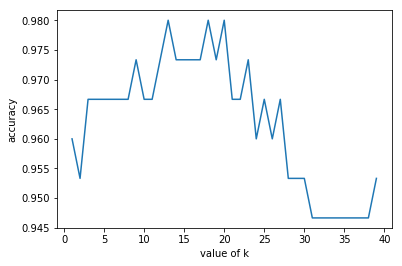

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
#plotting value of k verus the accuracy of the model
plt.plot(k_range,k_scores)
plt.xlabel('value of k')
plt.ylabel('accuracy')

from the plot we conclude the n=21 is the best value of n for knn accuracy

In [13]:
knn=KNeighborsClassifier(n_neighbors=21)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print('accuracy :',scores.mean())

accuracy : 0.9666666666666666


# Application of cross-validation in feature selection

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [21]:
# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [22]:
#create a python list of three feature names
feature_cols=['TV','radio','newspaper']

#use the list to select a subset of data
X=data[feature_cols]
y=data.sales

In [29]:
#10 fold cross-validation with all the three features
lm=LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores)#because signs are negative

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [30]:
#convert from mse scores to rmse scores
r_scores=np.sqrt(-scores)

#printinf the mean of rmse
print(r_scores.mean())

1.6913531708051799


In [33]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766
